<a href="https://colab.research.google.com/github/EfaOnyianta/Sales-Prediction/blob/main/project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import set_config
set_config(display='diagram')

In [2]:
## Create a function 
def model_metrics(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  ## Train
  mae = round(mean_absolute_error(y_train, pipe.predict(x_train)),4)
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),4)
  r2 = round(r2_score(y_train, pipe.predict(x_train)),6)
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

  ## Test
  mae = round(mean_absolute_error(y_test, pipe.predict(x_test)),4)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),4)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),6)

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

###Functions
Metrics for X_train

mae = mean_absolute_error(y_train, model_pipeline.predict(x_train))

mse = mean_squared_error(y_train, model_pipeline.predict(x_train))

rmse = np.sqrt(mean_squared_error(y_train, model_pipeline.predict(x_train)))

r2 = r2_score(y_train, model_pipeline.predict(x_train))

Metrics for X_test

mae = mean_absolute_error(y_test, model_pipeline.predict(x_test))

mse = mean_squared_error(y_test, model_pipeline.predict(x_test))

rmse = np.sqrt(mean_squared_error(y_test, model_pipeline.predict(x_test)))

r2 = r2_score(y_test, model_pipeline.predict(x_test))

##Loading Data

In [3]:
path = '/content/sales_predictions (1).csv'
df = pd.read_csv('/content/sales_predictions (1).csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


we need to make a copy of the original to avoid manipulations

In [4]:
#SAVE copy
sales_df = df.copy()

##Checking for duplicates and missing Values, and dropping dupes and replacing missing values 

In [5]:
#get sum of missing values from te df
sales_df.isna().sum().sum()

3873

In [6]:
#display the sum of missing values from each column
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#check for duplicate rows
sales_df.duplicated().sum()
# no duplicated rows no need to drop anythything


0

In [8]:
#analyse data info from the data
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
#display descriptive stats for categorical columns 
sales_df.describe(include = 'object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


I think ill get rid of item identifier, there are too many variables, vs the others might be predictable/ add to the data. 

In [10]:
#now im going to check the values in the columns that are left
sales_df.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
dtype: int64

So there are incorrect values, this column is suppost to only have 2 values Regular and Low Fat, im going to replace LF, reg, and low fat. 

In [11]:
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content']. replace({'LF':'Low Fat','reg': 'Regular','low fat': 'Low Fat'})
sales_df.value_counts('Item_Fat_Content')
#The duplicate values have been changed. 

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

In [12]:
sales_df.value_counts('Outlet_Type')
#the other vluaes were checked and there were no other dupl values. 

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
dtype: int64

In [13]:
sales_df.value_counts('Outlet_Size')
#Hight doesnt make sense when it comes to outlet size, im replacing it to large. 

Outlet_Size
Medium    2793
Small     2388
High       932
dtype: int64

In [14]:
sales_df['Outlet_Size'] = sales_df['Outlet_Size']. replace('High','Large')
sales_df.value_counts('Outlet_Size')

Outlet_Size
Medium    2793
Small     2388
Large      932
dtype: int64

##Train test splitting and preprocessing 

I'm going to Identify the features (X) and target (y)  "Item_Outlet_Sales" column is our target and the rest of the relevant variables are out features. i already identified the categorical columns and decided which ones i want to keep. ill review the numberical to see if there are any columns that should be not included in the data split. 

In [15]:
#I'm going to Identify the features (X) and target (y)  "Item_Outlet_Sales" column is our target and the rest of the relevant variables are out features
sales_df.head().value_counts
sales_df.describe(include = 'float')

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [16]:
#splitting data
target= 'Item_Outlet_Sales'
X = sales_df.drop(columns=[target,'Item_Identifier','Outlet_Establishment_Year']).copy()
y =  sales_df[target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
#making numeric and categorical selectors
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

numb_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline (freq_imputer, ohe)

category_selector = make_column_selector(dtype_include='object')
numb_selector = make_column_selector(dtype_include = 'number')

category_tuple = (cat_pipe, category_selector)
numb_tuple = (numb_pipe, numb_selector)
preprocessor = make_column_transformer(category_tuple,numb_tuple, remainder = 'drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6c8075d90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6c8082070>)])

In [32]:
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [19]:
np.isnan(X_train_processed).sum().sum()

0

In [20]:
X_train_processed.dtype

dtype('float64')

In [21]:
X_test_processed.dtype

dtype('float64')

##Modeling the data
Were goign to create multiple models to see how well of a fit they have with the data on hand. 

In [22]:
dumb = DummyRegressor(strategy='mean')
dumb_pipe = make_pipeline(preprocessor, dumb)
dumb_pipe.fit(X_train, y_train)
model_metrics(dumb_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Dumb Model')

Dumb Model Train Scores
MAE: 1,360.2184 
MSE: 2,959,455.7045 
RMSE: 1,720.3069 
R2: 0.0000

Dumb Model Test Scores
MAE: 1,326.1210 
MSE: 2,772,144.4627 
RMSE: 1,664.9758 
R2: -0.0048



In [23]:
linear_reg = LinearRegression()
linear_reg_pipe = make_pipeline(preprocessor, linear_reg)
linear_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6c8075d90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6c8082070>)])),
                ('linearregression', LinearRegression())])

In [24]:
training_predictions =linear_reg_pipe.predict(X_train)
test_predicitons = linear_reg_pipe.predict(X_test)
training_predictions [:5]

array([3750., 2531., 2564., 1580., 1908.])

In [25]:
train_r2 = np.corrcoef(y_train, training_predictions)[0][1]**2
test_r2 = np.corrcoef(y_test, test_predicitons)[0][1]**2
print(f'Training Model R2: {train_r2}')
print( f'Testing Model R2: {test_r2}')


Training Model R2: 0.5601771829181824
Testing Model R2: 0.5686388477872815


In [26]:
model_metrics(linear_reg_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='LinearRegression')

LinearRegression Train Scores
MAE: 847.9745 
MSE: 1,301,679.8610 
RMSE: 1,140.9119 
R2: 0.5602

LinearRegression Test Scores
MAE: 802.3840 
MSE: 1,191,253.3383 
RMSE: 1,091.4455 
R2: 0.5682



For this model the R2 on trianing was .560 and on test .568
and the RMSE was 1140 on train and 1091 on test. This isnt too bad and it does not seem to have high bias or variance. 

##Regression Tree

###Decision Tree
Now were making  a regression to see if this performs better.Random Forest seems like the best choice for needs to be done. 

In [35]:
target= 'Item_Outlet_Sales'
X = sales_df.drop(columns=[target,'Item_Identifier','Outlet_Establishment_Year']).copy()
y =  sales_df[target].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='constant')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

numb_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline (freq_imputer, ohe)

category_selector = make_column_selector(dtype_include='object')
numb_selector = make_column_selector(dtype_include = 'number')

category_tuple = (cat_pipe, category_selector)
numb_tuple = (numb_pipe, numb_selector)
preprocessor = make_column_transformer(category_tuple,numb_tuple, remainder = 'drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6c230ca60>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6c230cd00>)])

In [59]:
preprocessor.fit(X_train)
X_train2 = preprocessor.transform(X_train)
X_test2 = preprocessor.transform(X_test)

In [61]:
dec_tree = DecisionTreeRegressor(max_depth = 4, random_state = 42)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree.fit(X_train2, y_train)
train_pred = dec_tree.predict(X_train2)
test_pred = dec_tree.predict(X_test2)
train_score = dec_tree.score(X_train2, y_train)
test_score = dec_tree.score(X_test2, y_test)
print(train_score)
print(test_score)

0.5826254141089582
0.5840048628592629


In [45]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [46]:
dec_tree.get_depth()

44

In [114]:
depths = list(range(2,44))
score = pd.DataFrame(index = depths,columns = ['Test Scores', 'Training Scores'])
for depth in depths: 
  dec_tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
  dec_tree.fit(X_train2, y_train)
  train_score = dec_tree.score(X_train2, y_train)
  test_score = dec_tree.score(X_test2, y_test)
  score.loc[depth, 'Training Scores'] = train_score
  score.loc[depth, 'Test Scores']= test_score


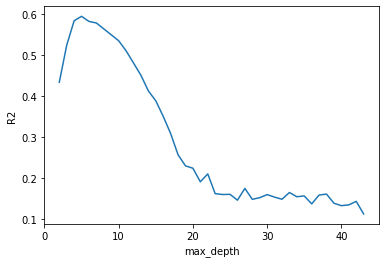

In [115]:
plt.plot(depths,score['Test Scores'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [69]:
sorted_score = score.sort_values(by = 'Test Scores', ascending = False)
sorted_score.head()

,Test Scores,Training Scores
5,0.59471,0.60394
4,0.584005,0.582625
6,0.582274,0.615161
7,0.578449,0.626841
8,0.563986,0.643842


In [73]:
dec_tree5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree5.fit(X_train2, y_train)
train_score5 = dec_tree5.score(X_train2, y_train)
test_score5 = dec_tree5.score(X_test2, y_test)
print(train_score5)
print(test_score5)

0.6039397477322956
0.5947099753159973


In [133]:
deci_tree = DecisionTreeRegressor(max_depth = 5, random_state = 42)
deci_tree_pipe = make_pipeline(preprocessor, deci_tree)
deci_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6c230ca60>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6c230cd00>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [134]:
model_metrics(dec_tree_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Decision Tree Model')

Decision Tree Model Train Scores
MAE: 788.1049 
MSE: 1,235,201.5991 
RMSE: 1,111.3962 
R2: 0.5826

Decision Tree Model Test Scores
MAE: 750.1611 
MSE: 1,147,721.1352 
RMSE: 1,071.3175 
R2: 0.5840



This has tuned it so it performs better overall. Testng R2 was .60 and test R2 was .59 so very close and not showing much bias or variance. 
The RMSE on training was 1,111 to the testing RMSE of 1071. the gap of error is not that bad either. 



Now im testing the random forest model to see if this performs better with some tuning. 

In [77]:
rforest= RandomForestRegressor(random_state = 42)
rforest.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [84]:
rforest.fit(X_train2, y_train)
rforest.predict(X_test2)
rforest_train_score = rforest.score(X_train2, y_train)
rforest_test_score = rforest.score(X_test2, y_test)
print(rforest_train_score)
print(rforest_test_score)

0.4626508431891335
0.4659544910443051


In [125]:
rforest= RandomForestRegressor(max_depth= 6,random_state = 42)
rforest.fit(X_train2, y_train)
rforest.predict(X_test2)
rforest_train_score = rforest.score(X_train2, y_train)
rforest_test_score = rforest.score(X_test2, y_test)
print(rforest_train_score)
print(rforest_test_score)

0.6245768287253063
0.601344043169544


In [131]:
ran_for = RandomForestRegressor(max_depth= 6,random_state = 42)
ran_for_pipe = make_pipeline(preprocessor, ran_for)                           
ran_for_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6c230ca60>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe6c230cd00>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=6, random_state=42))])

In [132]:
model_metrics(ran_for_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Random Forest Model')

Random Forest Model Train Scores
MAE: 742.1276 
MSE: 1,111,048.2458 
RMSE: 1,054.0627 
R2: 0.6246

Random Forest Model Test Scores
MAE: 727.3509 
MSE: 1,099,882.7305 
RMSE: 1,048.7529 
R2: 0.6013



So it seems the random forest model is a better fit for the data. it ran a .62 on the  testing but only a .60 on the test. It performs pretty well 60%+ and there is not much variance in the 2 scores showing there was no leakage and that the data is not overfit to the model since it tperforms well on tests too. The RMSE on trainign was 1054 to the testing 1048 so the difference in erro is very smal and its smaller than the model for the decision tree. 

From the data I have it seem that Random forest Model was the best fit for that data. Among all the models it had the lowers margin of error on RMSE and R2. 


###Random Forest Model Train Scores
####MAE: 742.1276 
####MSE: 1,111,048.2458 
####RMSE: 1,054.0627 
####R2: 0.6246



###Random Forest Model Test Scores
####MAE: 727.3509 
####MSE: 1,099,882.7305 
####RMSE: 1,048.7529 
####R2: 0.601


Decision Tree Model Train Scores
####MAE: 788.1049 
####MSE: 1,235,201.5991 
####RMSE: 1,111.3962 
####R2: 0.5826

Decision Tree Model Test Scores
####MAE: 750.1611 
####MSE: 1,147,721.1352 
####RMSE: 1,071.3175 
####R2: 0.5840